# Overview of scikit learn library

***scikit-learn*** is a python compatible machine learning opensource library. It really has a very well documented [Tutorial](https://scikit-learn.org/stable/tutorial/index.html) where users have access to the entire documentation with examples. Even though there are multiple examples in the tutorials, in this notebook we will try to execute some examples and complement the official tutorial.

## Introduction to scikit-learn

scikit-learn has build in datasets already in the library to start making some proofs and test the functionalities. In this case, it has been taken the wine recognition dataset [wine recognition dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine) (Lichman, M. 2013)

In [1]:
from sklearn import datasets
wine=datasets.load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

As we cna see, data is stored as array format, each asset in the array has 13 numeric values. Those values corresponds following attributes (available in [Sklearn library documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset)):

- Alcohol
- Malic acid
- Ash
- alcalinity of ash
- Magnesium
- total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

***wine.data*** gives access to the features that can be used to classify the wines samples

In [2]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

meanwhile ***wine.target*** gives the true corresponding to the class each wine has depending on its composition in the attributes. In case we want to know the name of each type class we can use ***wine.target_names*** to do so.

In [3]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### Learning an predicting

In the case of wine dataset, the task is to predict, given a wine with measurements in each of the 13 parameters listed above, in which class will fall in. an estimator for classification in this case is support vector classification.

In [12]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C=100.)

within the estimator, we can use the methods ***fit(X,y)*** and ***predict(T)***. As first instance, ***clf*** instance is first fitted to the model with the aim to learn from the model by passing the training set to the ***fit*** method. In this case, we have used the entire dataset but last value to train model.

In [13]:
clf.fit(wine.data[:-1],wine.target[:-1])

SVC(C=100.0, gamma=0.001)

We use the last value of the dataset to predict its value.

In [14]:
clf.predict(wine.data[-1:])

array([2])

if we just load the target value in the dataset for this exact position, we can see it has the same as the predicting one

In [5]:
wine.target[-1:]

array([2])

### Predicting an output variable from high dimensional observations

The ***wine dataset***  is a classification task where 3 different classes are identified *(class_0, class_1, class_2)* from 13 attributes listed above

In [6]:
import numpy as np

wine_X, wine_Y = datasets.load_wine(return_X_y=True)
np.unique(wine_Y)


array([0, 1, 2])

Here we use K-Nearest neighbors classifier

In [7]:
# Split wine data in train and test data
np.random.seed(0) #random permutation, to split the data randomly
indices = np.random.permutation(len(wine_X))
wine_X_train = wine_X[indices[:-10]]
wine_Y_train = wine_Y[indices[:-10]]
wine_X_test = wine_X[indices[:-10]]
wine_Y_test = wine_Y[indices[:-10]]
# Create and fit nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(wine_X_train, wine_Y_train)
knn.predict(wine_X_test)

array([0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2,
       1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1,
       1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2,
       2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1])

In [8]:
wine_Y_test

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1,
       2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1,
       2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1])

# Demonstration of three interesting scikit-learn algorithms

This section aims to demonstrate three different scikit-learn algorithms in order to compare different methods.

To perform this task I have selected an interesting dataset from [**Forest Observatory Systems**](https://forest-observation-system.net) to measure the biomass. 

The Biomass dataset is an excel (.xlsx) package containing above-ground biomass estimation of above 260 forest plots divided in 1645 entries and scattered around the world. Majority of the plots have a size of 50x50 m. 

is an international cooperation aiming to establish an in-situ forest biomass database in order to support Earth Observation with reliable, up to date, representative and comparable data for validation (Schepaschenko, D. et al. 2019).

## Quick description of FOS Biomass dataset

In [2]:
#import pandas and geopandas library
import pandas as pd
#import geopandas as gp
## We don't need to download the dataset, by putting the direct url, Pandas will read the file directly
path = (r'https://forest-observation-system.net/Data/FOS_Plots_v2019.04.10.xlsx')
df = pd.read_excel (path)
df

,Plot_ID,Sub-plot_ID,CountryName,Network,Institution,Link,YearEstablished,YearCensus,PI team,Lat_cnt,...,AGB_Chave,AGB_ChaveCred_2.5,AGB_ChaveCred_97.5,Wood density,GSV,BA,Ndens,Reference,Other_Measurements,Biomass processing protocol
0,ALF-01,0_0,Brazil,RAINFOR,Uni Leeds,http://www.rainfor.org,2002,2008,Beatriz Marimon (Universidade do Estado de Mat...,-9.60,...,370.4,307.1,469.3,0.638,NaN,NaN,NaN,"Phillips O. L., Aragão L. E. O. C. , Lewis S. ...",NaN,RepFOS_14Feb17_ForestPlots.pdf
1,ALF-01,0_1,Brazil,RAINFOR,Uni Leeds,http://www.rainfor.org,2002,2008,Beatriz Marimon (Universidade do Estado de Mat...,-9.60,...,163.6,130.5,217.3,0.612,NaN,NaN,NaN,"Phillips O. L., Aragão L. E. O. C. , Lewis S. ...",NaN,RepFOS_14Feb17_ForestPlots.pdf
2,ALF-01,0_2,Brazil,RAINFOR,Uni Leeds,http://www.rainfor.org,2002,2008,Beatriz Marimon (Universidade do Estado de Mat...,-9.60,...,220.4,188.1,257.8,0.646,NaN,NaN,NaN,"Phillips O. L., Aragão L. E. O. C. , Lewis S. ...",NaN,RepFOS_14Feb17_ForestPlots.pdf
3,ALF-01,0_3,Brazil,RAINFOR,Uni Leeds,http://www.rainfor.org,2002,2008,Beatriz Marimon (Universidade do Estado de Mat...,-9.59,...,179.6,155.0,209.2,0.645,NaN,NaN,NaN,"Phillips O. L., Aragão L. E. O. C. , Lewis S. ...",NaN,RepFOS_14Feb17_ForestPlots.pdf
4,ALP-01,0_0,Peru,RAINFOR,Uni Leeds,http://www.rainfor.org,1990,2005,Rodolfo Vasquez Martinez (Jardín Botánico de M...,-3.95,...,260.8,218.3,315.4,0.598,NaN,NaN,NaN,"Phillips O. L., Aragão L. E. O. C. , Lewis S. ...",NaN,RepFOS_14Feb17_ForestPlots.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,UK-53,1,Ukraine,IIASA,NULESU,http://nubip.edu.ua/en/node/1665,1956,2015,"P.I. Lakyda, O. Morozyuk, I.P. Lakyda",50.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1641,UK-TPP-201601,1,Ukraine,IIASA,NULESU,https://nubip.edu.ua/,2016,2016,"P.Lakyda, V.Radchenko, A.Bilous, R.Matyashuk",50.34,...,NaN,NaN,NaN,NaN,336.0,29.76,520.0,NaN,NaN,NaN
1642,UK-TPP-201602,1,Ukraine,IIASA,NULESU,https://nubip.edu.ua/,2016,2016,"P.Lakyda, V.Radchenko, A.Bilous, R.Matyashuk",50.34,...,NaN,NaN,NaN,NaN,484.0,38.30,357.0,NaN,NaN,NaN
1643,UK-TPP-201703,1,Ukraine,IIASA,NULESU,https://nubip.edu.ua/,2017,2017,"P.Lakyda, V.Radchenko, A.Bilous, R.Matyashuk, ...",50.34,...,NaN,NaN,NaN,NaN,304.0,34.25,487.0,NaN,NaN,NaN


At first, we can see that is tabular data in there and how is structured.


In [3]:
df.keys()

Index(['Plot_ID', 'Sub-plot_ID', 'CountryName', 'Network', 'Institution',
       'Link', 'YearEstablished', 'YearCensus', 'PI team', 'Lat_cnt',
       'Lon_cnt', 'Altitude', 'Slope, degree', 'PlotArea', 'Plot_shape',
       'Forest_Status', 'MinDBH', 'H_Lorey_local', 'H_Lorey_Chave',
       'H_Lorey_Feldpausch', 'H_max_Local', 'H_max_Chave', 'H_max_Feldpausch',
       'AGB_local', 'AGB_local_Cred_2.5', 'AGB_local_97.5', 'AGB_Feldpausch',
       'AGB_Feldpausch_Cred_2.5', 'AGB_Feldpausch_Cred_97.5', 'AGB_Chave',
       'AGB_ChaveCred_2.5', 'AGB_ChaveCred_97.5', 'Wood density', 'GSV', 'BA',
       'Ndens', 'Reference', 'Other_Measurements',
       'Biomass processing protocol'],
      dtype='object')

By using the ***df.keys*** it displays all the fields within the database

By looking at some relevant data within the database, we could explore the distribution of some of the variables in there.

0.10.1


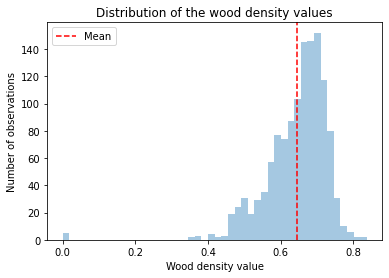

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(df['Wood density'],kde = False)
mean=df['Wood density'].mean()
print(sns.__version__)
plt.axvline(mean, color='r', linestyle='--')
plt.legend({'Mean':mean})
plt.title('Distribution of the wood density values')
plt.xlabel('Wood density value')
plt.ylabel('Number of observations')  
plt.show()

We can see the distribution of wood density values and the mean value per observation.

Text(0.5, 1.0, 'AGB Chave 97.5')

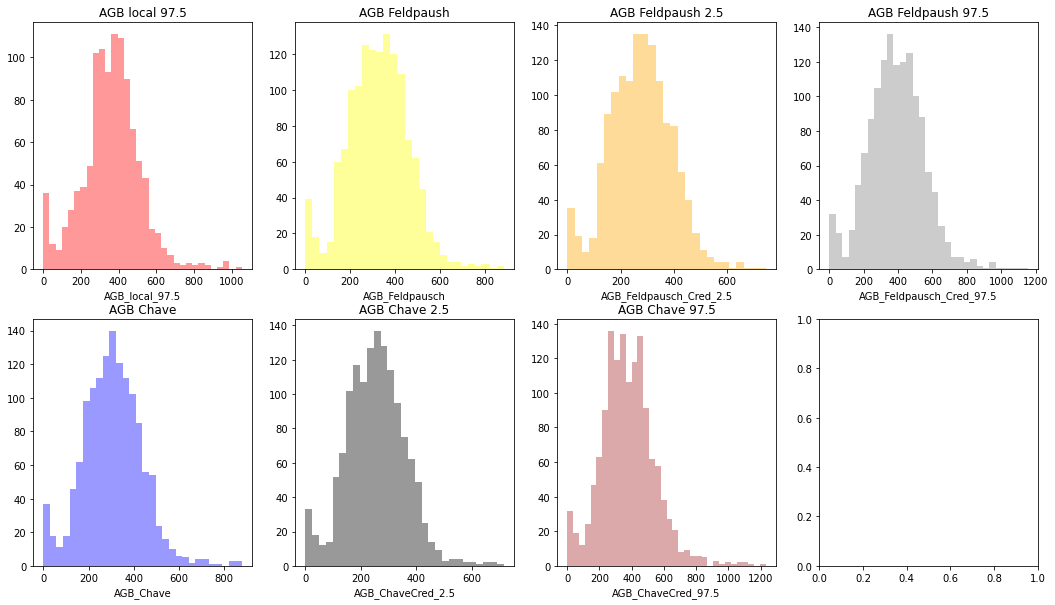

In [5]:
fig, axs = plt.subplots(2, 4,figsize=(18, 10))
sns.distplot(df['AGB_local_97.5'],kde = False,ax=axs[0,0],color='red')
sns.distplot(df['AGB_Feldpausch'],kde = False,ax=axs[0,1],color='yellow')
sns.distplot(df['AGB_Feldpausch_Cred_2.5'],kde = False,ax=axs[0,2],color='orange')
sns.distplot(df['AGB_Feldpausch_Cred_97.5'],kde = False,ax=axs[0,3],color='grey')
sns.distplot(df['AGB_Chave'],kde = False,ax=axs[1,0],color='blue')
sns.distplot(df['AGB_ChaveCred_2.5'],kde = False,ax=axs[1,1],color='black')
sns.distplot(df['AGB_ChaveCred_97.5'],kde = False,ax=axs[1,2],color='brown')
axs[0,0].set_title('AGB local 97.5')
axs[0,1].set_title('AGB Feldpaush')
axs[0,2].set_title('AGB Feldpaush 2.5')
axs[0,3].set_title('AGB Feldpaush 97.5')
axs[1,0].set_title('AGB Chave')
axs[1,1].set_title('AGB Chave 2.5')
axs[1,2].set_title('AGB Chave 97.5')

Above we can compare different above ground biomass measurements within the database

Other cell to take into account is the ***Forest_status*** attribute. By analysing this variable we can understand the kind of forest per observation.

In [6]:
df['Forest_Status'].value_counts()

Old-growth lowland moist mixed forest                                                 394
Mature                                                                                 24
Secondary Forest                                                                       20
Slope Primary Forest                                                                   20
Ridge Primary Forest                                                                   20
                                                                                     ... 
Fir-Hornbeam with aspen                                                                 1
Fir-Beech-Hornbeam                                                                      1
Старая культура сосны с Б, Д, Е, Рб, Чр в А2 лещиновая папоротниково-разнотравная.      1
Fir-Ash-Hornbeam                                                                        1
Mixed fresh highland forest, age 88, selective logging                                  1
Name: Fore

We have taken the variables **Wood density**, **H_Lorey_local**, **Altitude**, **MinDBH**, **AGB_ChaveCred_97.5**.

In [55]:

df_sub = df[['Wood density','H_Lorey_local', 'Altitude', 'MinDBH', 'AGB_ChaveCred_97.5']]
# Eliminating NaN or missing input numbers
df_sub.fillna(method ='ffill', inplace = True)
df_sub


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Wood density,H_Lorey_local,Altitude,MinDBH,AGB_ChaveCred_97.5
0,0.638,27.0,NaN,10.0,469.3
1,0.612,23.8,NaN,10.0,217.3
2,0.646,23.0,NaN,10.0,257.8
3,0.645,22.1,NaN,10.0,209.2
4,0.598,22.1,NaN,10.0,315.4
...,...,...,...,...,...
1640,0.589,41.0,1358.0,5.0,269.7
1641,0.589,23.0,159.0,8.0,269.7
1642,0.589,22.5,171.0,8.0,269.7
1643,0.589,18.7,171.0,8.0,269.7


## First algorithm : LinearRegression

Reference: [geeksforgeeks.org](https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/)

we are going to reshape all variables as it is indicated in Sklearn tutorials.

In [143]:
X = np.array(df_sub['Wood density']).reshape(-1, 1)
y = np.array(df_sub['AGB_ChaveCred_97.5']).reshape(-1, 1)
z = np.array(df_sub['H_Lorey_local']).reshape(-1, 1)
t = np.array(df_sub['MinDBH']).reshape(-1, 1)
d = np.array(df_sub['Altitude']).reshape(-1, 1)

Looking into dataset, looks it could be a clear case for linear regression example combining several attributes. Multi-layer perceptron is highly sensitive to feature scaling. In sklearn it clearly indicates to scale the data [0,1] or [-1,+1], or standarize it to have mean 0 and variance 1. 

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_sub.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.140378937422022


<ipython-input-144-0ced39c7c186>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.dropna(inplace = True)


By exploring the results, we will see how they look like with the regression line.

Text(0.5, 1.0, 'Data scatered of predicted values')

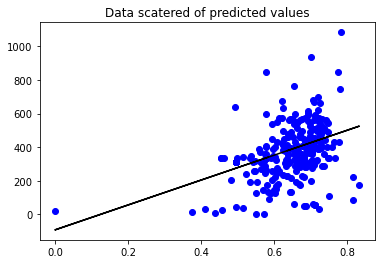

In [145]:
y_pred=regr.predict(X_test)
plt.scatter(X_test,y_test, color='b')
plt.plot(X_test, y_pred, color = 'k')
plt.title("Data scatered of predicted values")

we can see now clearer that the low accuracy of the prediction is corresponded with the plot.

We will work with smaller dataset to see if results improve

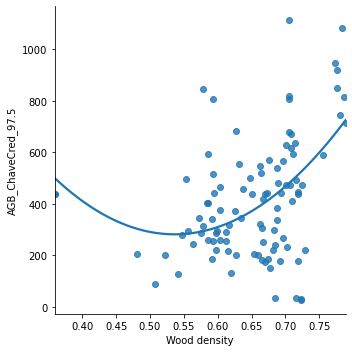

In [146]:
df_sub100 = df_sub[:][100:200]
# Selecting the 100st 200 rows of the data
sns.lmplot(x ="Wood density", y ="AGB_ChaveCred_97.5", data = df_sub100,
                               order = 2, ci = None)

In [147]:

df_sub100.fillna(method ='ffill', inplace = True)
  
X = np.array(df_sub100['Wood density']).reshape(-1, 1)
y = np.array(df_sub100['AGB_ChaveCred_97.5']).reshape(-1, 1)
  
df_sub100.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.2781060903394079


Even though it improves a bit the precision, it looks it's not enough to get. Even with that we will take a look at the results.

Text(0.5, 1.0, 'Data scatered of predicted values')

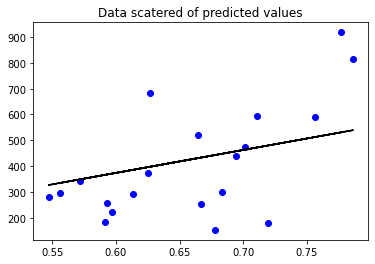

In [148]:
y_pred=regr.predict(X_test)
plt.scatter(X_test,y_test, color='b')
plt.plot(X_test, y_pred, color = 'k')
plt.title("Data scatered of predicted values")

### Getting more variables involved

We have created a new dataset just with the variables we want as input

In [154]:
new = [df_sub['AGB_ChaveCred_97.5'], df_sub['H_Lorey_local'],df_sub['MinDBH'], df_sub['Altitude']]
headers = ["AGB","H_Lorey_local","MinDBH","Altitude"]
outputs = df_sub['Wood density']
inputs = pd.concat(new, axis=1, keys=headers)
inputs

,AGB,H_Lorey_local,MinDBH,Altitude
228,337.6,31.725827,10.0,159.0
229,337.6,31.725827,10.0,159.0
230,337.6,31.725827,10.0,159.0
231,337.6,27.887300,10.0,433.0
232,337.6,27.887300,10.0,433.0
...,...,...,...,...
1640,269.7,41.000000,5.0,1358.0
1641,269.7,23.000000,8.0,159.0
1642,269.7,22.500000,8.0,171.0
1643,269.7,18.700000,8.0,171.0


We prepare the model and we take all inputs but the last one

In [157]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(inputs[:-1], outputs[:-1])

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.48111326673853655
Coefficients: 
 [ 2.36248970e-04 -6.92889833e-04  6.16158768e-03  5.97375191e-05]


Now we run the prediction for the last value of the inputs.

In [158]:
regr.predict(inputs[-1:])

array([0.59034106])

If we check the value in the dataset, 

In [161]:
outputs[-1:]

1644    0.589
Name: Wood density, dtype: float64

Looks like for this one, at least the predicting model get really close to the stored value.

## Second algorithm: Support Vector Machine (SVM)

In [197]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

clf = svm.SVC(gamma = 0.001, C=100.)
inputs.values
outputs = [df_sub["Wood density"]]

headers = ["Wood density"]
outputs_v2 = pd.concat(outputs, axis=1, keys=headers)
outputs_v2.values
label_encoder = preprocessing.LabelEncoder()
Y = label_encoder.fit_transform(outputs_v2)
X = preprocessing.StandardScaler().fit_transform(inputs)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
X_train , X_test, y_train, y_test = train_test_split(X,Y)

In [199]:
clf = svm.SVC(C=1.0, kernel='rbf').fit(X_train[:-10],y_train[:-10])

In [200]:
clf.predict(X[-10:])

array([208, 208, 208, 208, 208, 792, 114, 114, 114, 114])

In [201]:
Y[-10:]

array([172,  89, 100, 201, 161, 161, 161, 161, 161, 161])

In [202]:
print(clf.score(X_test, y_test))

0.1267605633802817


## Third algorithm: Neural Network

In [203]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train[:-10],y_train[:-10])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [204]:
clf.predict(X[-10:])

array([247, 247, 247, 247, 247, 430, 593, 593, 593, 593])

In [205]:
Y[-10:]

array([172,  89, 100, 201, 161, 161, 161, 161, 161, 161])

In [206]:
print(clf.score(X_test, y_test))

0.10422535211267606


## References

- Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

- Schepaschenko, D., Chave, J., Phillips, O. L., Lewis, S. L., Davies, S. J., Réjou-Méchain, M., ... & Labrière, N. (2019). The Forest Observation System, building a global reference dataset for remote sensing of forest biomass. Scientific data, 6(1), 1-11
